In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('First Phase_ baseball.csv')

In [6]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
print(data.to_string())

      W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  SV    E
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8  56   88
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12  45   86
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10  38   79
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9  37  101
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12  35   86
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   10  34   88
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3    4  48   93
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   10  43   77
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   12  60   95
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   10  40   97
10   88  751  5511  1

In [8]:
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [9]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [11]:
data.shape

(30, 17)

In [12]:
data['CG']= data['CG'].replace(0, data['CG'].mean( ))

In [13]:
data.head(15)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2.000000,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2.000000,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11.000000,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7.000000,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7.000000,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7.000000,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3.000000,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,3.466667,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1.000000,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3.000000,10,40,97


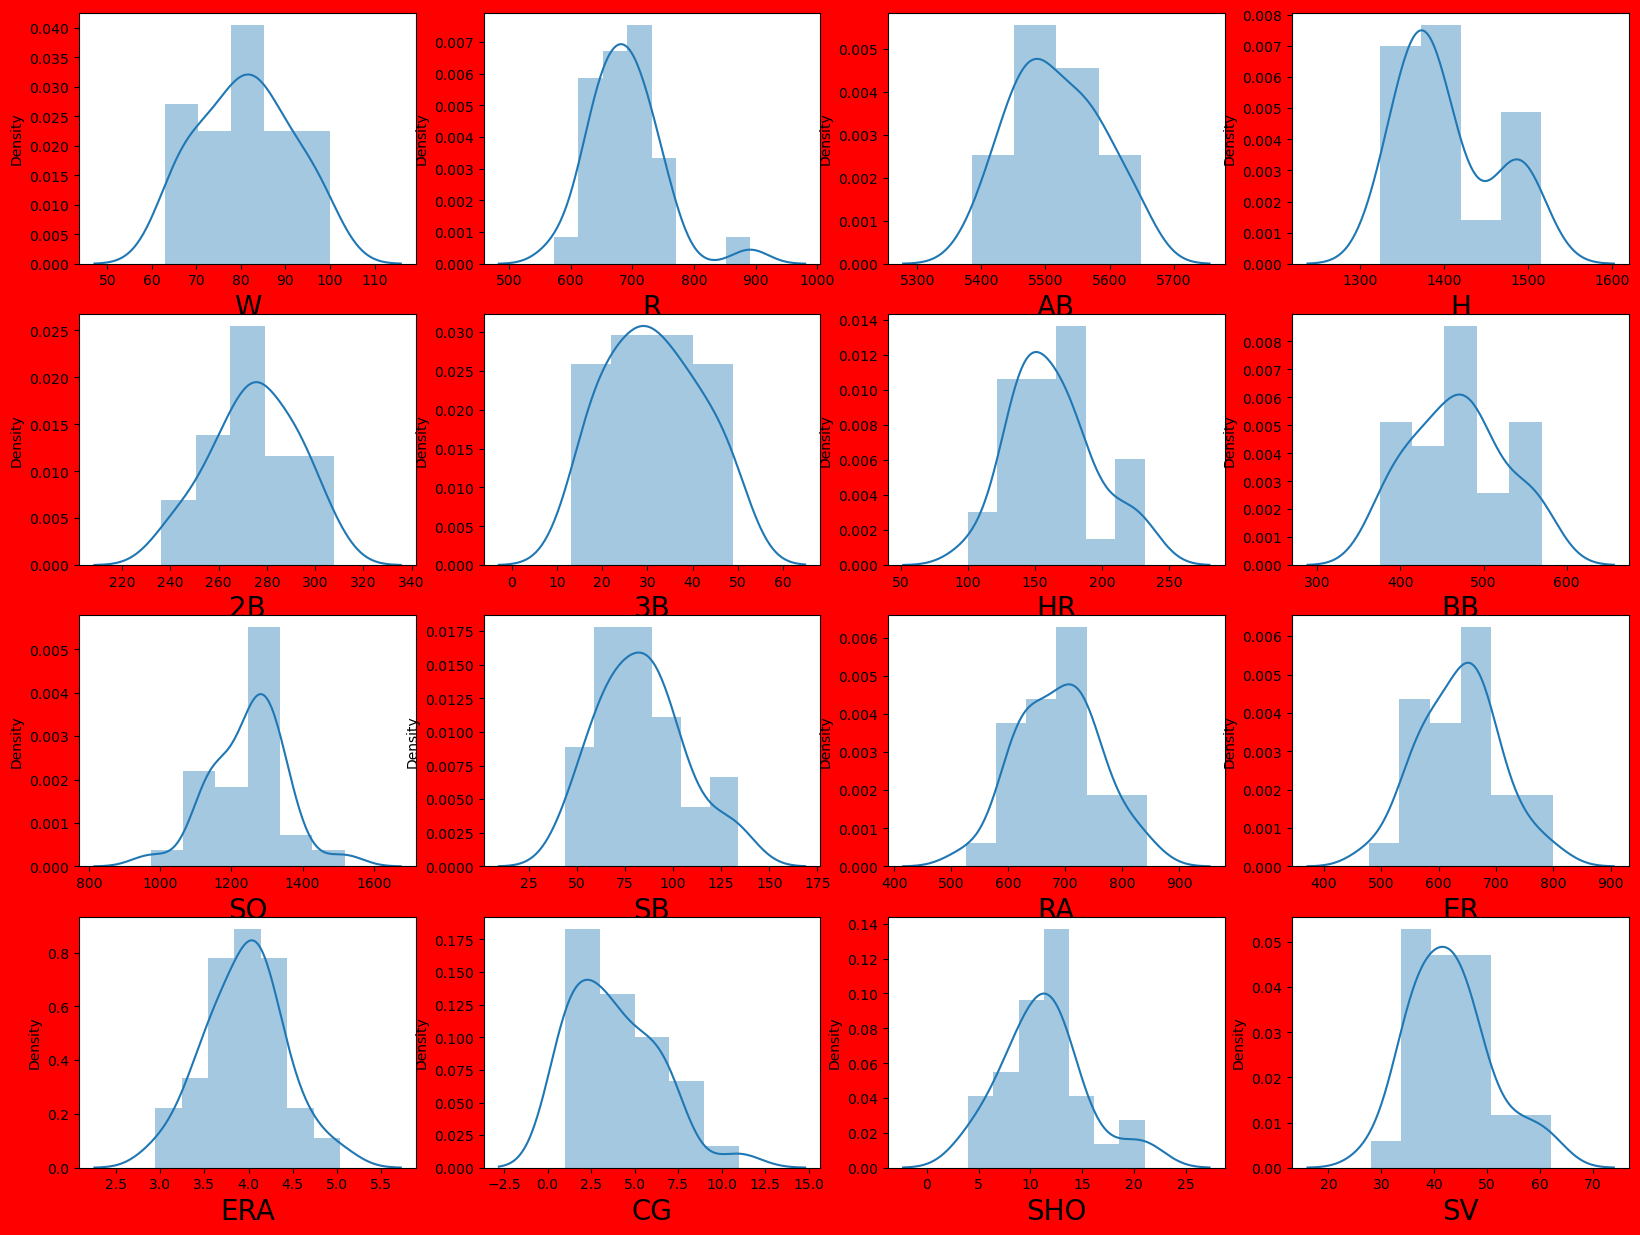

In [14]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1
for column in data:
      if plotnumber<=16:
            ax=plt.subplot(4,4,plotnumber)
            sns.distplot(data[column])
            plt.xlabel(column, fontsize=20)
            plotnumber+=1
plt.show( )


In [15]:
# Features R,H,HR,SO,CG,SHO,SV are to be addressed for Normal distribution
from scipy.stats import zscore


In [16]:
z_score=zscore( data[['R','H','HR','SO','CG','SHO','SV']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]   

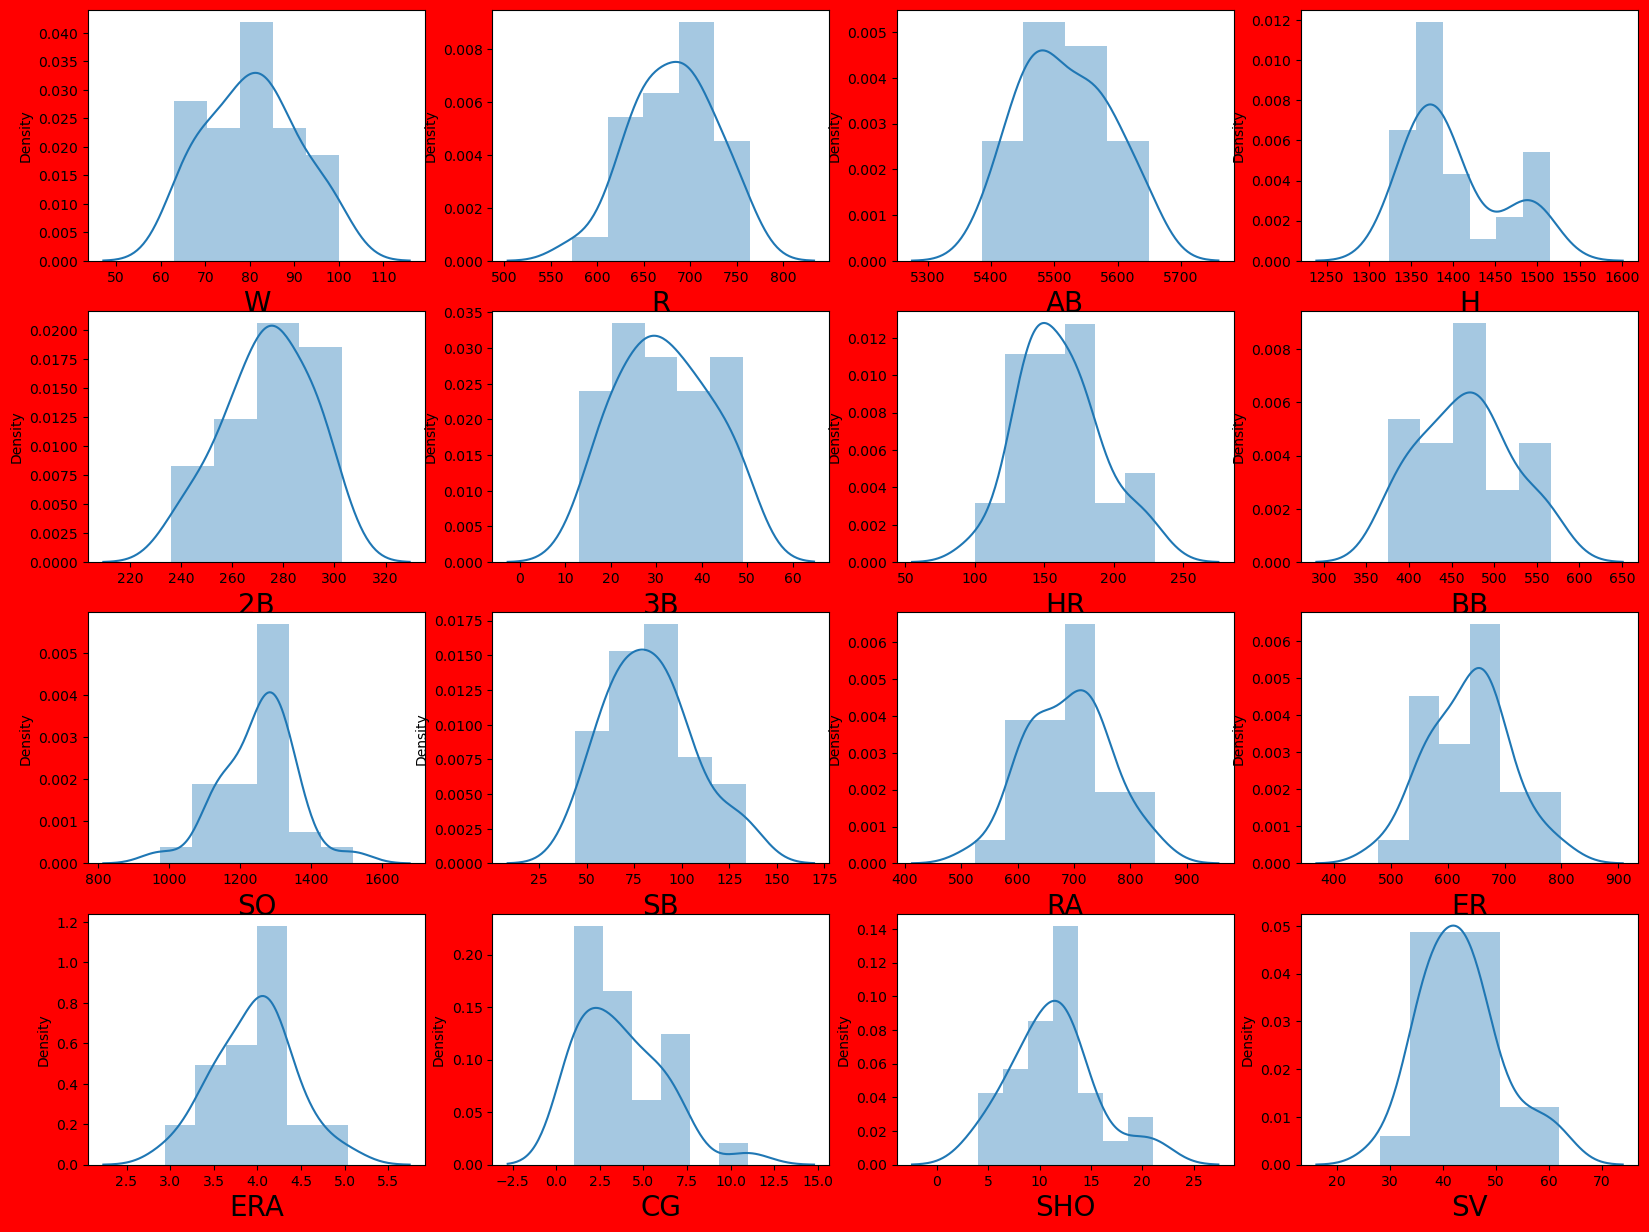

In [17]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1
for column in data:
      if plotnumber<=16:
            ax=plt.subplot(4,4,plotnumber)
            sns.distplot(data[column])
            plt.xlabel(column, fontsize=20)
            plotnumber+=1
plt.show( )


In [18]:
# Still CG,SHO,H can be treated further for outliers 
z_score=zscore( data[['H','CG','SHO']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<2).all(axis=1)
data=data[filtering_entry]   

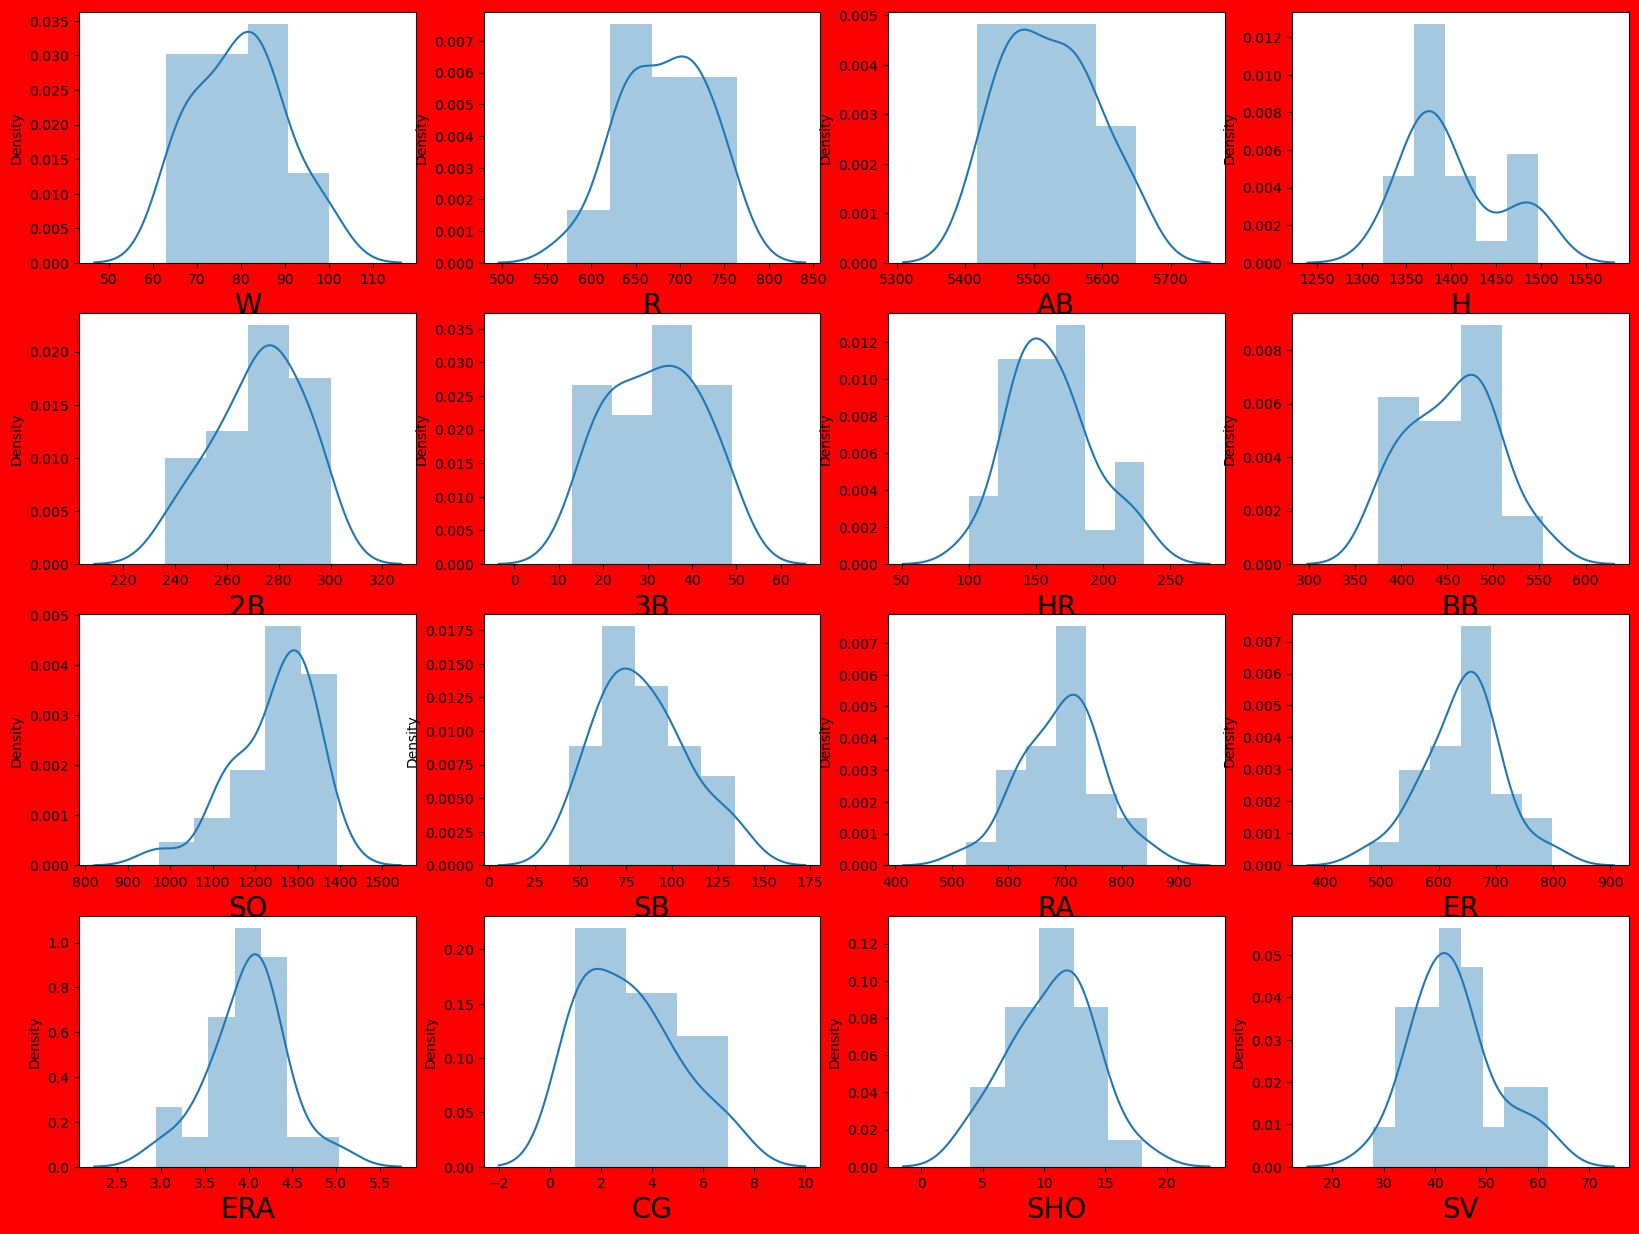

In [19]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1
for column in data:
      if plotnumber<=16:
            ax=plt.subplot(4,4,plotnumber)
            sns.distplot(data[column])
            plt.xlabel(column, fontsize=20)
            plotnumber+=1
plt.show( )

In [20]:
print(data.to_string())

      W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA        CG  SHO  SV    E
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73  2.000000    8  56   88
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07  2.000000   12  45   86
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98  7.000000    9  37  101
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03  3.000000    4  48   93
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05  3.466667   10  43   77
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74  1.000000   12  60   95
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31  3.000000   10  40   97
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24  5.000000    9  45  119
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57  5.000000   13  39   85
12   85  661  5417  1331  243  21  176  435  1150 

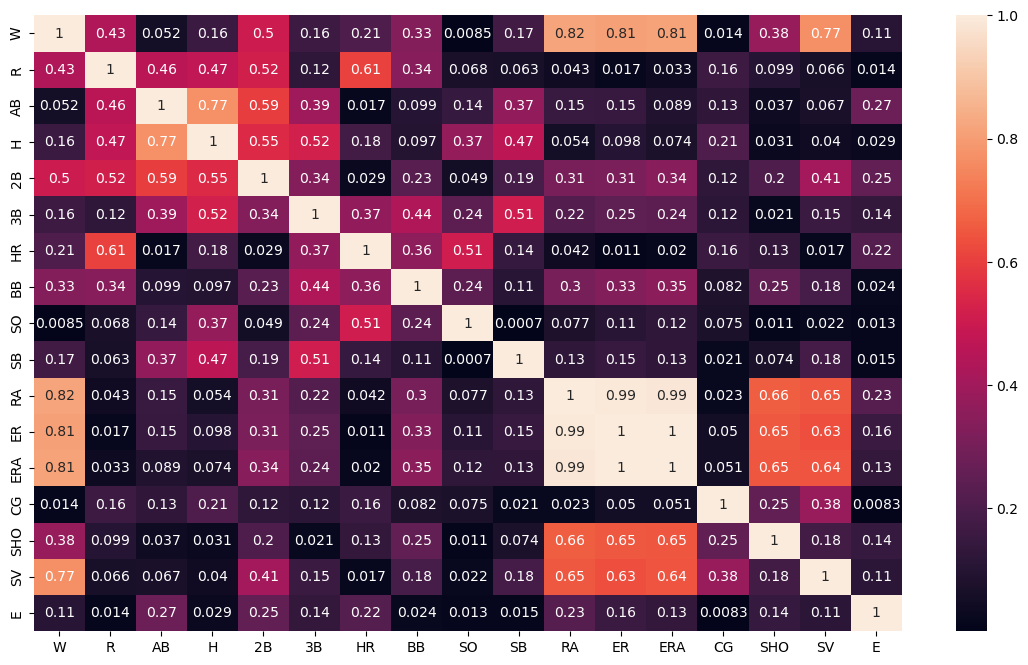

In [21]:
 # plotting Heatmap (Correlation matrix) it’s a technique to find relationship strength between features and labels and among labels (multi-collinearity)
df_corr = data.corr().abs()
plt.figure(figsize=(14, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size': 10})
plt.show()

In [22]:
# Now heatmap shows some multicollinearity issues between RA & ERA, RA & ER and ER & ERA
# Also  H & AB shows multicollinearity issues
# As RA is highest contributor of label, therefore ER and ERA can be dropped
# Also in case of H & AB, H is bigger contributor than AB so it will be maintained for model training

In [23]:
# Now dataset is ready for model building so drop label and multicollinear feature
X=data.drop(columns=['ER','ERA','AB','W','CG'])
Y=data['W']
print(X)
print(Y)

      R     H   2B  3B   HR   BB    SO   SB   RA  SHO  SV    E
0   724  1497  300  42  139  383   973  104  641    8  56   88
1   696  1349  277  44  156  439  1264   70  700   12  45   86
3   622  1381  260  27  136  404  1231   68  701    9  37  101
6   764  1397  272  19  212  554  1227   63  698    4  48   93
7   713  1370  246  20  217  418  1331   44  693   10  43   77
8   644  1383  278  32  167  436  1310   87  642   12  60   95
9   748  1495  294  33  161  478  1148   71  753   10  40   97
10  751  1419  279  32  172  503  1233  101  733    9  45  119
11  729  1363  278  26  230  486  1392  121  618   13  39   85
12  661  1331  243  21  176  435  1150   52  675   12  46   93
13  656  1379  262  22  198  478  1336   69  726   12  45   94
14  694  1405  277  46  146  475  1119   78  729   15  28  126
15  647  1386  288  39  137  506  1267   69  525   15  62   96
16  697  1462  292  27  140  461  1322   98  596   13  54  122
18  655  1378  274  34  145  412  1299   84  737    7  

In [24]:
scalar=StandardScaler(  )
X_scalar= scalar.fit_transform (X)


In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scalar,Y, test_size=0.25, random_state=41)

In [26]:
# Function to repeatedly check accuracy of different models

def metric_score(pred, X_train, X_test, y_train, y_test, train=True):
    if train:
        y_pred_train = pred.predict(X_train)
        print('\n============== Train Results ==============')
        print(f'r2_score: {r2_score(y_train, y_pred_train) * 100:.2f}%')
        
       
    else:
        y_pred_test = pred.predict(X_test)
        print("\n============== Test Results ==============\n")
        print(f'r2_score: {r2_score(y_test, y_pred_test) * 100:.2f}%')
        print(f'Mean_Absolute_Error: {mean_absolute_error(y_test, y_pred_test):.2f}%')
        print(f'Mean_Squared_Error: {mean_squared_error(y_test, y_pred_test):.2f}%')
        print(f'Root_Mean_Squared_Error: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}%')
        




In [27]:
#Initialize Model
lin_reg=LinearRegression( )
lin_reg.fit(X_train,Y_train)


LinearRegression()

In [28]:
metric_score(lin_reg, X_train,X_test,Y_train,Y_test, train=True)

metric_score(lin_reg, X_train,X_test,Y_train,Y_test, train=False)

Y_pred=lin_reg.predict(X_test)
Y_pred


============== Train Results ==============
r2_score: 99.11%

============== Test Results ==============

r2_score: 42.64%
Mean_Absolute_Error: 5.04%
Mean_Squared_Error: 34.20%
Root_Mean_Squared_Error: 5.85%


array([90.82759177, 71.93115949, 74.65035461, 75.03610706, 84.15399424,
       80.30843792, 85.35298947])

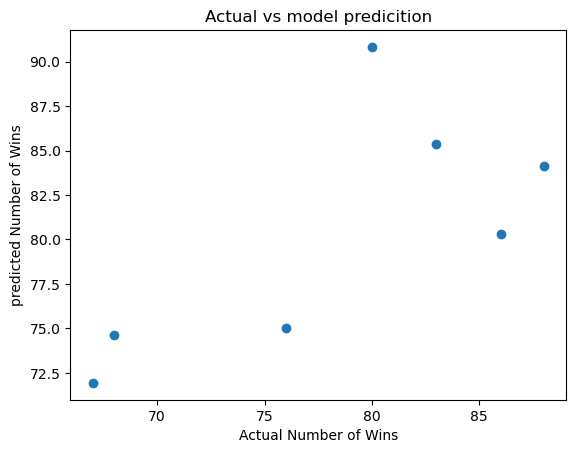

In [29]:
plt.scatter(Y_test,Y_pred)    
plt.xlabel('Actual Number of Wins')
plt.ylabel('predicted Number of Wins')
plt.title('Actual vs model predicition')
plt.show( )


In [30]:
import pickle

pickle.dump(lin_reg, open('lin_reg_model', 'wb'))

In [31]:
loaded_model= pickle.load(open('lin_reg_model', 'rb'))  

In [32]:
loaded_model.predict(X_test)

array([90.82759177, 71.93115949, 74.65035461, 75.03610706, 84.15399424,
       80.30843792, 85.35298947])

In [33]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [34]:
lasscv=LassoCV(alphas=None, max_iter=15)
lasscv.fit(X_train,Y_train)

LassoCV(max_iter=15)

In [35]:
metric_score(lasscv, X_train,X_test,Y_train,Y_test, train=True)

metric_score(lasscv, X_train,X_test,Y_train,Y_test, train=False)

Y_pred=lasscv.predict(X_test)
Y_pred


============== Train Results ==============
r2_score: 97.54%

============== Test Results ==============

r2_score: 32.04%
Mean_Absolute_Error: 5.20%
Mean_Squared_Error: 40.53%
Root_Mean_Squared_Error: 6.37%


array([92.89989941, 71.69283839, 74.13466409, 78.32715873, 81.46066466,
       83.03394535, 83.80553438])

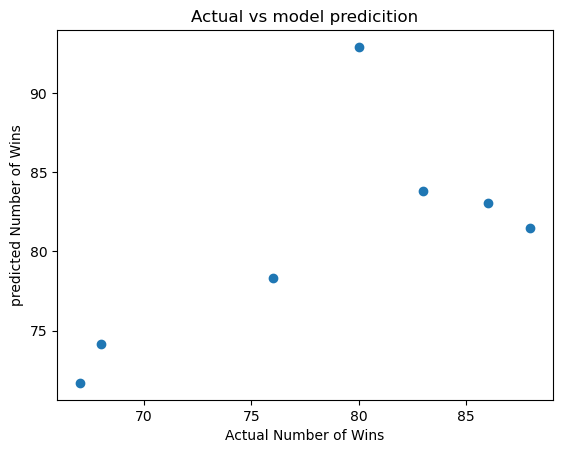

In [36]:
plt.scatter(Y_test,Y_pred)    
plt.xlabel('Actual Number of Wins')
plt.ylabel('predicted Number of Wins')
plt.title('Actual vs model predicition')
plt.show( )

In [37]:
ridgecv = RidgeCV(alphas=np.arange(0.001, 0.1, 0.01))
ridgecv.fit(X_train, Y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [39]:
metric_score(ridgecv, X_train,X_test,Y_train,Y_test, train=True)

metric_score(ridgecv, X_train,X_test,Y_train,Y_test, train=False)

Y_pred=ridgecv.predict(X_test)
Y_pred


============== Train Results ==============
r2_score: 99.10%

============== Test Results ==============

r2_score: 41.23%
Mean_Absolute_Error: 4.99%
Mean_Squared_Error: 35.04%
Root_Mean_Squared_Error: 5.92%


array([91.16742807, 71.83455533, 74.64462055, 75.55412564, 83.6811061 ,
       80.51024401, 85.01993882])

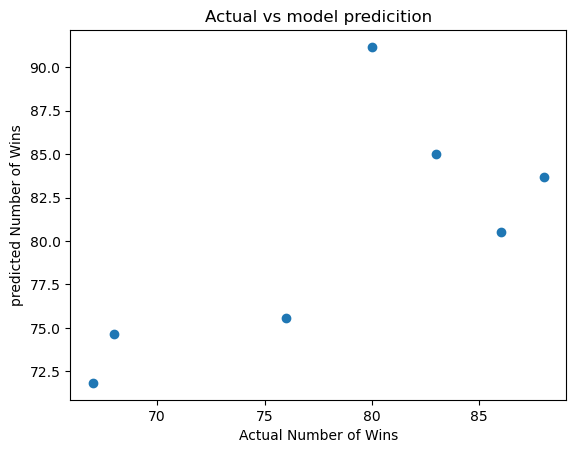

In [40]:
plt.scatter(Y_test,Y_pred)    
plt.xlabel('Actual Number of Wins')
plt.ylabel('predicted Number of Wins')
plt.title('Actual vs model predicition')
plt.show( )

In [ ]:
# Hence the best r2_score and least MAE,MSE,RMSE belongs to LASSOCV model